In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import platform
import matplotlib as mpl 
from konlpy.tag import Okt,Kkma,Hannanum
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import nltk
from tqdm import tqdm_notebook
import time
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## 여자친구 선물 검색(10 page) 크롤링 

In [27]:
present_text = ''
answer_count = 0
page_num = 1
driver = webdriver.Chrome('D:/workspace/data-home/05.Crawling/chromedriver.exe')
for n in tqdm_notebook(range(1,page_num+1)):
    start_page = n * 10 - 9
    url = f'https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query=%EC%97%AC%EC%9E%90+%EC%B9%9C%EA%B5%AC+%EC%84%A0%EB%AC%BC&c_id=&c_name=&sm=tab_pge&kin_start={start_page}&kin_age=0'
    driver.get(url)
    for k in driver.find_elements_by_css_selector('.question_group'):
        k.click()
        driver.switch_to_window(driver.window_handles[1])
        while True:
            try:
                driver.find_element_by_css_selector("#nextPageButton").click()
                # print('click')
            except:
                # print('break')
                break
        gifts = driver.find_elements_by_css_selector(".se-main-container")
        time.sleep(1)
        for gift in gifts:
            answer_count += 1
            gift_text = gift.text
            present_text = present_text + gift_text + '\n'
        driver.close()
        driver.switch_to_window(driver.window_handles[0])
    # html = driver.page_source
    # soup = BeautifulSoup(html, 'html.parser')
    # presents = soup.select(".bx._svp_item")
    # for i in range(len(presents)):
    #     present_text = present_text + presents[i].get_text() + '\n'
driver.close()
answer_count


InvalidSelectorException: Message: invalid selector: An invalid or illegal selector was specified
  (Session info: chrome=87.0.4280.88)


In [6]:
with open('./data/present_text.txt','w',encoding='UTF-8') as f:
    f.write(present_text)

## 크롤링한 데이터로 워드클라우드 만들기

In [7]:
with open('./data/present_text.txt','r',encoding='UTF-8') as f:
    present_text = f.read()

In [8]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','거','요','색상','요즘','가격','피부','세대',
              '수','의', '자', '에', '안', '번', '호', '을', '이', '다', '만', '로', '가', '를','때','활동','안고','더','것','저','생각','추천','파트너','스', 
              '통해','수수료','상품','선물','여자친구','남자친구','제품','제','이미지','클릭','뭔가','쿠팡','선택','정액','제공','달','위','끌','사용','우랑',
              '자기','의미','에어','여자','브랜드','고민','구매','가능','등','직접','디자인','때문','센스','도움','사랑','인치','마음','인기','케이스','뭐','진짜',
              '여성','사이트','정말','핸드','하나','채택','모델','해','답변','여친','가지','중','워터','손','라면','판매']

In [9]:
okt = Okt()
gift = [word for word in okt.nouns(present_text) if word not in stop_words]
# gift = okt.nouns(present_text)
ko = nltk.Text(gift,name='여자친구 선물')
# ko.vocab().most_common()

In [10]:
print(len(ko.tokens)) 
print(len(set(ko.tokens))) 

20015
3224


In [11]:
ko.vocab().most_common(100)

[('목걸이', 243),
 ('무드등', 194),
 ('사진', 177),
 ('커플', 143),
 ('향', 110),
 ('향수', 109),
 ('연극', 105),
 ('시간', 98),
 ('나', 96),
 ('귀걸이', 93),
 ('악세사리', 89),
 ('쇼핑몰', 87),
 ('하트', 86),
 ('꽃', 83),
 ('비', 82),
 ('아이패드', 79),
 ('제작', 77),
 ('팔찌', 77),
 ('스토어', 76),
 ('개', 74),
 ('주얼리', 73),
 ('분', 70),
 ('네이버', 70),
 ('한번', 68),
 ('굿', 67),
 ('향기', 66),
 ('사이', 66),
 ('배송', 64),
 ('쇼핑', 63),
 ('친구', 60),
 ('가성', 60),
 ('및', 60),
 ('매니아', 60),
 ('오늘', 59),
 ('후기', 59),
 ('화장품', 58),
 ('기념일', 58),
 ('데이트', 57),
 ('할인', 56),
 ('생일', 56),
 ('아이', 55),
 ('메이드', 55),
 ('뼘', 55),
 ('가방', 54),
 ('실버', 54),
 ('이벤트', 52),
 ('액세서리', 52),
 ('링크', 51),
 ('커플링', 51),
 ('미쁜', 51),
 ('용', 49),
 ('관람', 48),
 ('참고', 47),
 ('데', 47),
 ('맞춤', 47),
 ('연인', 47),
 ('혜택', 47),
 ('미니', 46),
 ('사람', 46),
 ('명품', 46),
 ('부담', 46),
 ('머리', 45),
 ('심플', 45),
 ('폰', 45),
 ('세트', 44),
 ('님', 44),
 ('블루투스', 43),
 ('시', 43),
 ('케이크', 43),
 ('반지', 42),
 ('더욱', 42),
 ('일리', 42),
 ('조금', 41),
 ('꽃다발', 41),
 ('이어폰', 41),
 ('동영상'

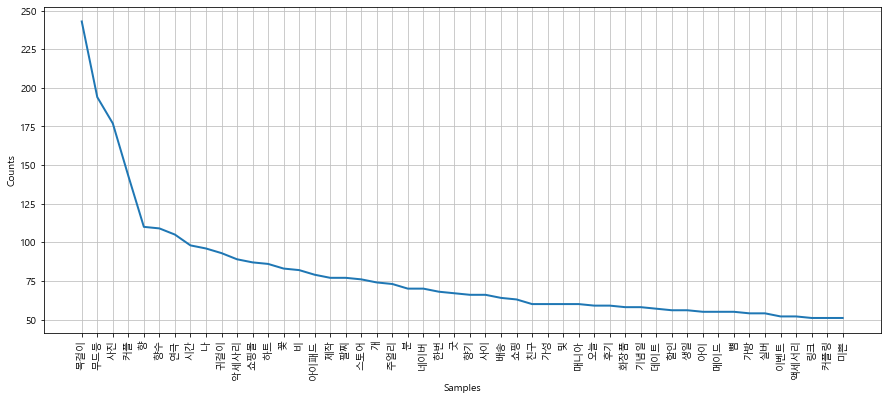

In [12]:
plt.figure(figsize = (15, 6))
ko.plot(50)
plt.show()

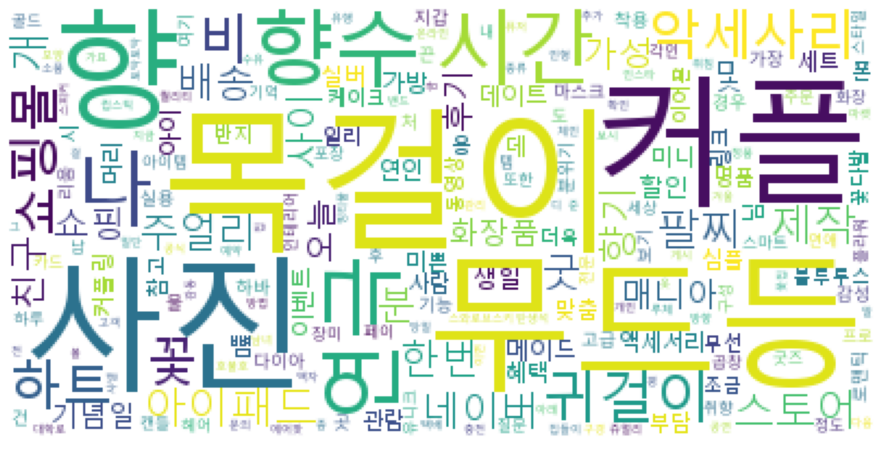

In [13]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color = 'white',
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
mask = np.array(Image.open("D:\workspace\data-home\home\data\heart.jpg"))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [15]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.1, mask = mask,
                      background_color = 'white',
                      min_font_size = 1,
                      max_font_size = 100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

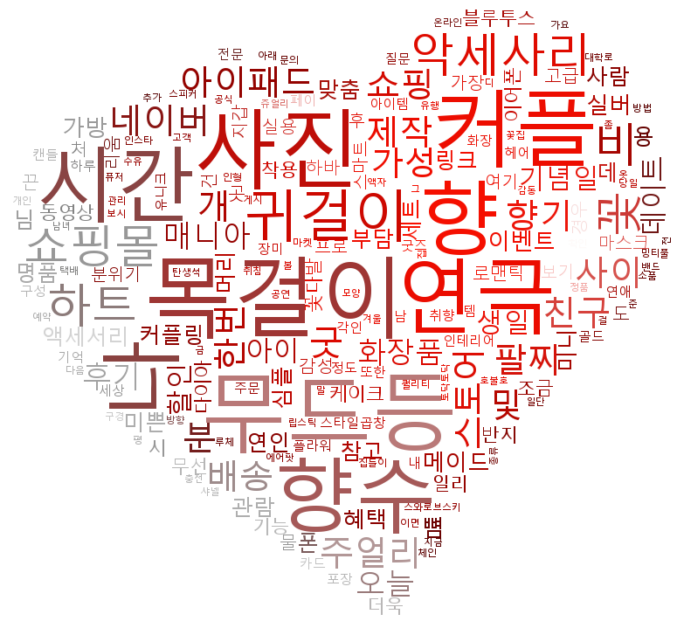

In [16]:
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.show()